In [168]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import os
import dotenv
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import requests
import json
%matplotlib inline

In [150]:
# Obtain Keys to connect to ALPACA API
load_dotenv() # True
CONSUMER_KEY = os.environ.get("ALPACA_API_KEY")

CONSUMER_SECRET_KEY = os.environ.get("ALPACA_SECRET_KEY")

In [157]:
ALPACA_URL='https://paper-api.alpaca.markets'
alpaca_api = tradeapi.REST(CONSUMER_KEY, CONSUMER_SECRET_KEY, ALPACA_URL, api_version='v2')

In [229]:
#The average household income for each member of the credit union is $12,000.
avg_inc=12000
#Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:
#Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.
#Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).
BTC=1.2
ETH=5.3
SPY_stock=50
AGG_bonds=200
monthly_income=12000

In [141]:
BTC_price=0.0
ETH_price=0.0
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [20]:
def getResponse(url):
    response= requests.get(url)
    
    
    if(response.status_code==200):
        json_response = response.json()
        #jsonData = json.dumps(json_response, indent=4, sort_keys=True)
    else:
        print("Error receiving data", response.status_code)
    return json_response




In [48]:
btc_response=getResponse(btc_url)


In [24]:
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18906356,
            "id": 1,
            "last_updated": 1640050034,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "CAD": {
                    "market_cap": 1147464799627.49,
                    "percent_change_1h": -0.870071702337711,
                    "percent_change_24h": -0.328977324466428,
                    "percent_change_7d": 0.203416284098842,
                    "price": 60519.4794,
                    "volume_24h": 36808258080.6818
                },
                "USD": {
                    "market_cap": 887169320881,
                    "percent_change_1h": -0.870071702337711,
                    "percent_change_24h": -0.328977324466428,
                    "percent_change_7d": 0.203416284098842,
                    "percentage_change_1h": -0.870071702337711,
                    "percentage_change_24h": -0.328977324466428,
                 

In [49]:
btc_response['data']['1']['quotes']['USD']['price']

47124.0

In [142]:
eth_response=getResponse(eth_url)

In [143]:
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 118825897,
            "id": 1027,
            "last_updated": 1640061514,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "CAD": {
                    "market_cap": 623509226329.974,
                    "percent_change_1h": 2.24131123946525,
                    "percent_change_24h": 3.65655021372187,
                    "percent_change_7d": 7.51380624579374,
                    "price": 5257.578951,
                    "volume_24h": 29280424442.1867
                },
                "USD": {
                    "market_cap": 482330955620,
                    "percent_change_1h": 2.24131123946525,
                    "percent_change_24h": 3.65655021372187,
                    "percent_change_7d": 7.51380624579374,
                    "percentage_change_1h": 2.24131123946525,
                    "percentage_change_24h": 3.65655021372187,
                    "percenta

In [139]:
def get_value(json_input, lookup_key):
        value = list(json_iterator(json_input, lookup_key))
        val = value[0] if value else None
        #print(f'lookup_key -> value : {val}')
        return val
def json_iterator(json_input, lookup_key):
    if isinstance(json_input, dict):
        for k, v in json_input.items():
            #print(f'{k} -- {v}')
            if k == lookup_key:
                yield v
            else:
                yield from json_iterator(v, lookup_key)
    elif isinstance(json_input, list):
        for item in json_input:
            yield from json_iterator(item, lookup_key)

In [144]:
BTC_price=get_value(btc_response,'USD')['price']
ETH_price=get_value(eth_response,'USD')['price']

In [145]:
print(BTC_price)

47124.0


In [146]:
print(ETH_price)

4067.13


In [149]:
print(f"The current value of your {BTC} BTC is ${BTC_price*BTC:0.2f}")
print(f"The current value of your {ETH} ETH is ${ETH_price*ETH:0.2f}")

The current value of your 1.2 BTC is $56548.80
The current value of your 5.3 ETH is $21555.79


In [148]:
Crypto_portfolio=round((BTC_price*BTC + ETH_price*ETH),2)
print(Crypto_portfolio)

78104.59


In [190]:
# Format current date as ISO format
NY = 'America/New_York'

edate = dt.date.today()
start=pd.Timestamp('2020-08-01', tz=NY).isoformat()
end=pd.Timestamp(edate, tz=NY).isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API, 
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
alpaca_api.get_barset(tickers, '1D', start=start, end=end, limit=1000).df

AGG                                         \
                               open      high       low    close    volume   
time                                                                         
2020-08-03 00:00:00-04:00  119.3700  119.4000  119.1903  119.400  17837420   
2020-08-04 00:00:00-04:00  119.4200  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.3900  119.4900  119.3100  119.400  34175883   
2020-08-06 00:00:00-04:00  119.6200  119.7300  119.5300  119.580   9009216   
2020-08-07 00:00:00-04:00  119.6600  119.7300  119.3950  119.445   8830420   
2020-08-10 00:00:00-04:00  119.5450  119.5692  119.2800  119.330   6630988   
2020-08-11 00:00:00-04:00  119.1100  119.2100  118.8400  118.985  11071582   
2020-08-12 00:00:00-04:00  118.7300  118.8900  118.6500  118.760   9097248   
2020-08-13 00:00:00-04:00  118.7800  118.7800  118.2400  118.320   5141695   
2020-08-14 00:00:00-04:00  118.4300  118.4900  118.2300  118.230   4268992   
2020-08-17 00:00:00-04:00  118.3800  118.4700  118.3050  118.330   7350320   
2020-08-18 00:00:00-04:00  118.4279  118.6000  118.4200  118.540   6974488   
2020-08-19 00:00:00-04:00  118.6500  118.7000  118.3400  118.370   8072234   
2020-08-20 00:00:00-04:00  118.5800  118.7100  118.5600  118.570   7608213   
2020-08-21 00:00:00-04:00  118.7400  118.7600  118.5500  118.690   9369852   
2020-08-24 00:00:00-04:00  118.7200  118.8200  118.6000  118.620   8887200   
2020-08-25 00:00:00-04:00  118.3500  118.4600  118.1820  118.390   7179314   
2020-08-26 00:00:00-04:00  118.3500  118.4199  118.2100  118.360   9825986   
2020-08-27 00:00:00-04:00  118.5500  118.5600  117.9500  117.970  10931474   
2020-08-28 00:00:00-04:00  118.0800  118.1600  117.9900  118.120  10426068   
2020-08-31 00:00:00-04:00  118.1400  118.5100  118.1400  118.370  14652086   
2020-09-01 00:00:00-04:00  118.1200  118.4400  118.0000  118.430  18834492   
2020-09-02 00:00:00-04:00  118.4200  118.7100  118.3400  118.660   8565963   
2020-09-03 00:00:00-04:00  118.7300  118.8700  118.6200  118.690  11833793   
2020-09-04 00:00:00-04:00  118.4100  118.5200  118.0800  118.100   8095852   
2020-09-08 00:00:00-04:00  118.3400  118.4600  118.2000  118.230  11938683   
2020-09-09 00:00:00-04:00  118.3900  118.3900  118.0400  118.190  10977908   
2020-09-10 00:00:00-04:00  118.0900  118.2900  118.0150  118.230   7983732   
2020-09-11 00:00:00-04:00  118.4200  118.4900  118.2400  118.360  11853287   
2020-09-14 00:00:00-04:00  118.4700  118.4900  118.3100  118.370  11279340   
...                             ...       ...       ...      ...       ...   
2021-11-09 00:00:00-05:00  115.3800  115.5000  115.2900  115.330   6955738   
2021-11-10 00:00:00-05:00  115.1100  115.1400  114.3950  114.510   8821475   
2021-11-11 00:00:00-05:00  114.5100  114.5700  114.3000  114.340   3105027   
2021-11-12 00:00:00-05:00  114.5000  114.5850  114.2600  114.330   4398727   
2021-11-15 00:00:00-05:00  114.3000  114.3100  113.9100  113.930   6219329   
2021-11-16 00:00:00-05:00  113.9200  114.1100  113.8400  113.870   5317284   
2021-11-17 00:00:00-05:00  113.7900  114.1300  113.7700  114.130   5513227   
2021-11-18 00:00:00-05:00  114.0500  114.2800  114.0300  114.230   4115721   
2021-11-19 00:00:00-05:00  114.4900  114.5900  114.4150  114.450   4843203   
2021-11-22 00:00:00-05:00  114.1400  114.2300  113.8200  113.880   6216218   
2021-11-23 00:00:00-05:00  113.7100  113.7700  113.4500  113.450   5835080   
2021-11-24 00:00:00-05:00  113.4700  113.7250  113.3905  113.720   5959367   
2021-11-26 00:00:00-05:00  114.2800  114.5769  114.2000  114.540   2886169   
2021-11-29 00:00:00-05:00  114.1500  114.6000  114.1300  114.550   7604952   
2021-11-30 00:00:00-05:00  114.8700  115.1074  114.5000  114.765  10624796   
2021-12-01 00:00:00-05:00  114.2700  114.6400  114.2100  114.610  11306707   
2021-12-02 00:00:00-05:00  114.6700  114.7900  114.4001  114.610   7507924   
2021-12-03 00:00:00-05:00  114.5000  115.2400  114.460

In [191]:
alpaca_df=alpaca_api.get_barset(tickers, '1D', start=start, end=end, limit=1000).df

In [213]:
#Get the current closing prices for SPY and AGG.
agg_close_price=alpaca_df['AGG'].iloc[-1]['close']
spy_close_price=alpaca_df['SPY'].iloc[-1]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $457.365


In [215]:
# Compute the current value of shares
my_spy_value=SPY_stock*spy_close_price
my_agg_value=AGG_bonds*agg_close_price

# Print current value of shares
print(f"The current value of your {SPY_stock} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {AGG_bonds} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22868.25
The current value of your 200 AGG shares is $22824.00


In [216]:
Shares_portfolio=round((my_spy_value + my_agg_value),2)
print(Shares_portfolio)

45692.25


#### Savings Health Analysis
Assess the financial health of the credit union's members.

In [219]:
#create a DataFrame called df_savings with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.
details = {
    'crypto' : [Crypto_portfolio],
    'shares' : [Shares_portfolio]
}

portfolio_df = pd.DataFrame.from_dict(details, orient = 'index',columns=['amount'])

In [220]:
portfolio_df

,amount
crypto,78104.59
shares,45692.25


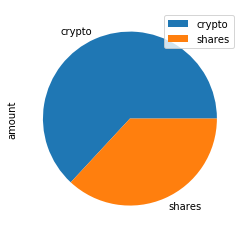

In [225]:
portfolio_df.plot.pie(y='amount')

In [237]:
#Emergency Fund calculation
Emergency_fund=monthly_income*3

In [245]:

def financial_health(portfolio_df,Emergency_fund):
    portfolio_fund=portfolio_df.sum().values[0]
    if portfolio_fund > Emergency_fund:
        print("Congratulations! You have enough money in your emergency fund.")
    elif portfolio_fund < Emergency_fund:
        print(f"Caution! You are short of reaching your emergency fund target. Gap is: ${Emergency_fund - portfolio_fund}")
    elif portfolio_fund == Emergency_fund:
        print("Congratulations! You have reached your financial target.")

In [246]:
financial_health(portfolio_df,Emergency_fund)

Congratulations! You have enough money in your emergency fund.
